In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import seaborn as sns


In [3]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
def predict_sentiment(texts, model, tokenizer):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=-1)
    predictions = torch.argmax(probs, dim=-1)
    return predictions.numpy()

In [5]:
test_data = pd.read_csv("train_text.csv")
texts = test_data["text"].tolist()
true_labels = test_data["true_label"].tolist()

In [6]:
predicted_labels = predict_sentiment(texts, model, tokenizer)
test_data["predicted_label"] = predicted_labels

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [7]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


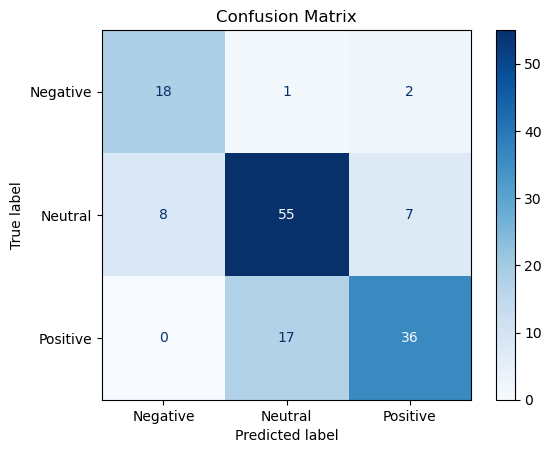

In [8]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [9]:
misclassified_texts = test_data[predicted_labels != np.array(true_labels)]["text"].tolist()
misclassified_text = " ".join(misclassified_texts)

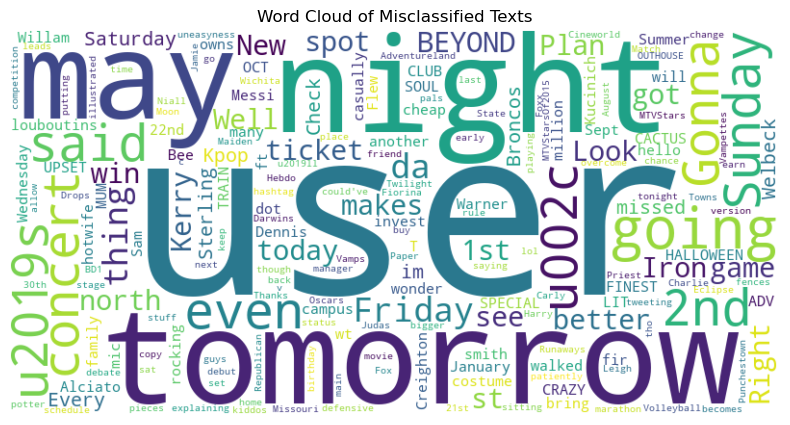

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(misclassified_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Misclassified Texts")
plt.show()

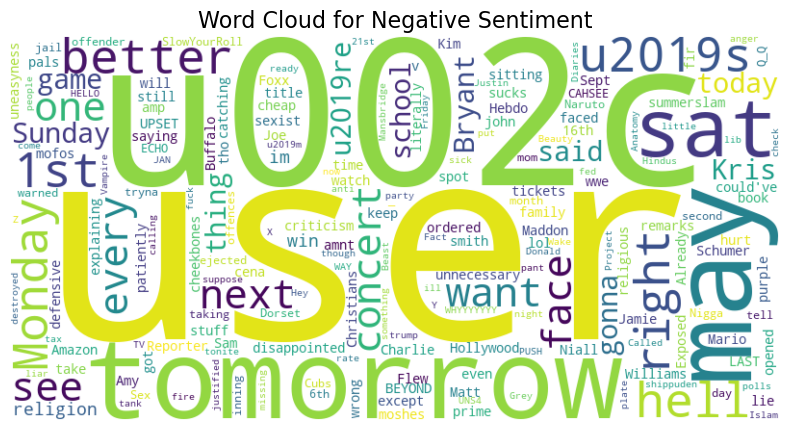

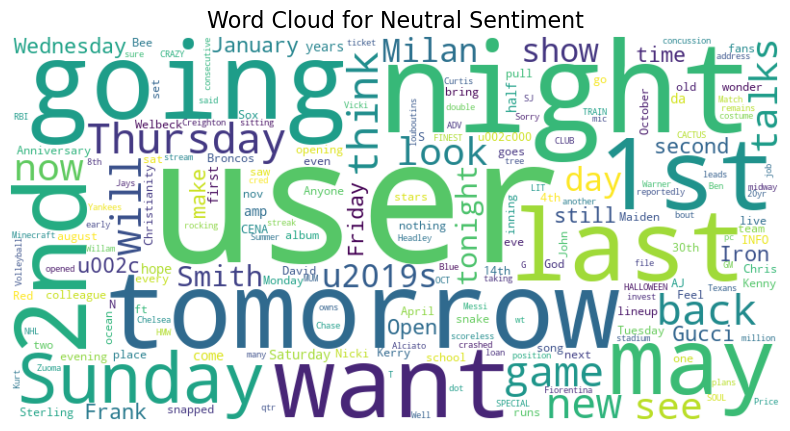

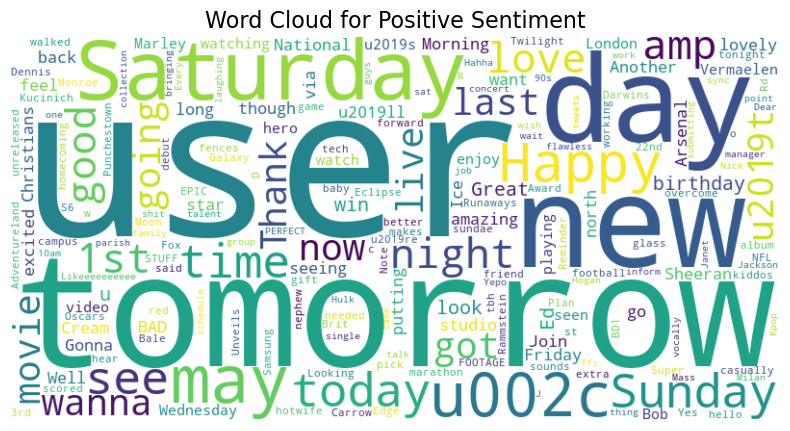

In [11]:
labels = ["Negative", "Neutral", "Positive"]
for label in range(3):  # Assuming 3 labels: 0=Negative, 1=Neutral, 2=Positive
    label_texts = test_data[test_data["predicted_label"] == label]["text"].tolist()
    combined_text = " ".join(label_texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {labels[label]} Sentiment", fontsize=16)
    plt.show()